# Figure F: Adams types

In [1]:
# Import 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import json

import sys
sys.path.append('../')
from helpers import cm2inch, title, show_num_contours, load_datasets
from melodic_contour import *
matplotlib.style.use('styles.mplstyle')

In [2]:
dfs, contours = load_datasets()

In [3]:
dataset_ids = ['erk', 'han', 'liber-antiphons']
types = {}
for dataset_id in dataset_ids:
    dataset_contours = [Contour(pitches) for pitches in contours[dataset_id]]
    adams_optimizer = TypologyOptimizer(AdamsTypology)
    best, res = adams_optimizer.optimize(dataset_contours[:1000], dict(tolerance=[0, 5]))
    A = AdamsTypology(tolerance=best['tolerance'])
    types[dataset_id] = [A.classify(c) for c in dataset_contours]

In [5]:
order = [
    'descending-both',
    'horizontal-both',
    'ascending-both',

    'descending-lowest-ascending',
    'horizontal-lowest-ascending',
    'ascending-lowest-ascending',

    'descending-highest-descending',
    'horizontal-highest-descending',
    'ascending-highest-descending',

    'descending-neither-ascending',
    'horizontal-neither-ascending',
    'ascending-neither-ascending',

    'descending-neither-descending',
    'horizontal-neither-descending',
    'ascending-neither-descending',
]

/Users/bas/repos/papers/contour-typology/env/lib/python3.7/site-packages/ipykernel_launcher.py:37: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
/Users/bas/repos/papers/contour-typology/env/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: Mean of empty slice.
  app.launch_new_instance()
/Users/bas/repos/papers/contour-typology/env/lib/python3.7/site-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/Users/bas/repos/papers/contour-typology/env/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: Mean of empty slice.
/Users/bas/repos/papers/contour-typology/env/lib/python3.7/site-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/Users/bas/

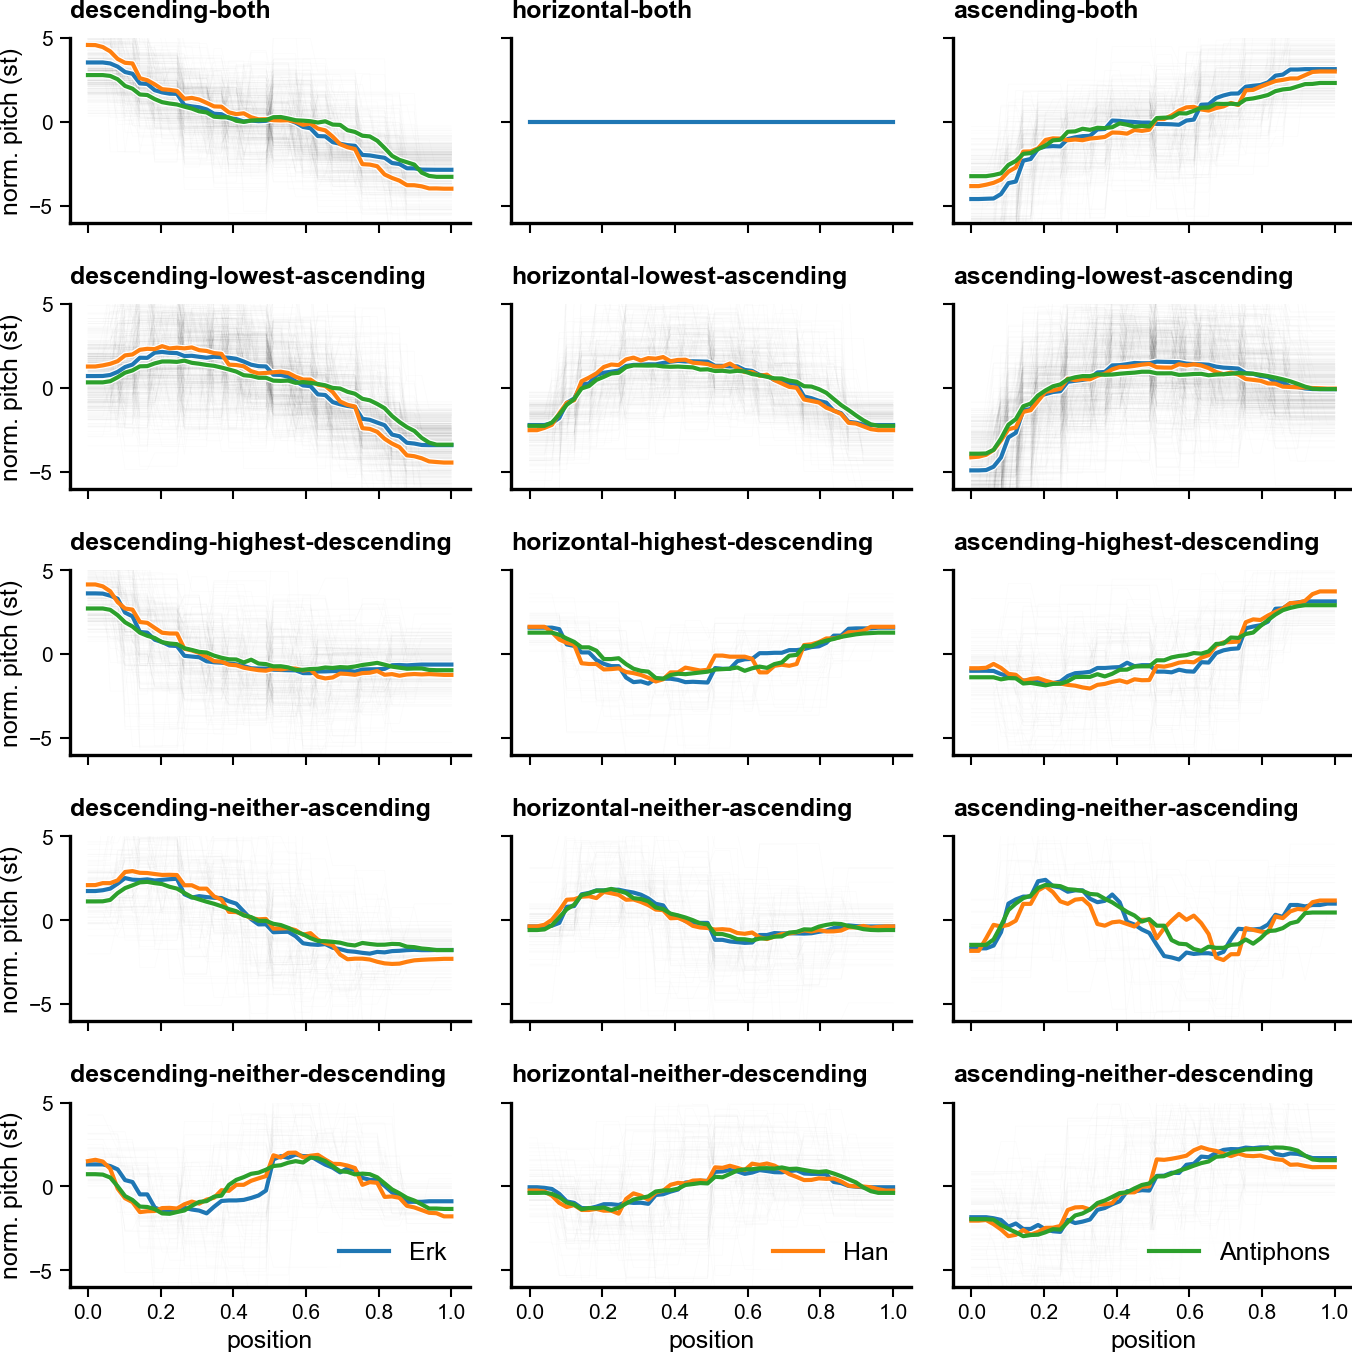

In [23]:
plt.figure(figsize=cm2inch(12,12))
colors = ['C0', 'C1', 'C2']
N=500
for i, contour_type in enumerate(order):
    column = i%3
    row = i//3
    ax = plt.subplot2grid((5, 3), (row, column))
    for j, dataset_id in enumerate(dataset_ids):
        df = dfs[dataset_id]
        cont = contours[dataset_id]
        xs = np.linspace(0, 1, cont.shape[1])

        has_right_type = [t == contour_type for t in types[dataset_id]]
        subset = cont[has_right_type]
        
        plt.plot(xs, subset.mean(axis=0), lw=1.6, c='w', zorder=1)
        plt.plot(xs, subset.mean(axis=0), lw=1, c=colors[j], zorder=2)

        if j== 0:
            color = 'k'
            plt.plot(xs, subset[:N,:].T, '-', color=color, lw=0.2, alpha=.015, zorder=-1);
            
        plt.title(contour_type, ha='left', x=0)
        if column == 0:
            plt.ylabel('norm. pitch (st)')
        else: 
            plt.gca().set_yticklabels([])
        if row == 4:
            plt.xlabel('position')
            lines = [plt.Line2D([0], [0], color=colors[column], lw=1)]
            labels = [dataset_ids[column].replace('liber-', '').capitalize()]
            plt.legend(lines, labels)
        else:
            plt.gca().set_xticklabels([])
        plt.ylim(-6,5)
        
    plt.tight_layout()

plt.savefig('../figures/figF1-adams-contour-types.pdf')